In [53]:
import pandas as pd 
import numpy as np 
import os 
from glob import glob
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
files = os.path.join("D:/ADSP/outcomes/*.csv")
files

'D:/ADSP/outcomes/*.csv'

In [3]:
allz = glob(files)

In [6]:
df = pd.concat(map(pd.read_csv, allz))
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,0c55996aabf2181ea32f5a5a6780dcc66bd4a6ab1eb4ec...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
1,2786374feaec6496c0cbb30f336fe4a989d16ea9f23bef...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Suspect charged
2,c1452865ba9750850a270f9d39cd57686caf113c49ece8...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
3,7ccd748e4eca96bc823dfa5f67e90e372375d60e6c93f6...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
4,0089a2ee187bebb98db3a73f57baa4cc8e9f8d325d89b6...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


In [7]:
files_2 = os.path.join("D:/ADSP/street/*.csv")
allz_street = glob(files_2)
df2 = pd.concat(map(pd.read_csv, allz_street))
df2.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,3213248c757541c6929959150b619ef987ae1c4b43d2ed...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.667245,51.817719,On or near Parking Area,E01017651,Aylesbury Vale 009A,Other theft,Investigation complete; no suspect identified,NaN
1,NaN,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.605640,51.814065,On or near Stocks Road,E01017702,Aylesbury Vale 009F,Anti-social behaviour,NaN,NaN
2,a3855a3a4c09d3d15afc2f0fdc85a4a15f60da28a9da6a...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.690612,51.792392,On or near Tring Hill,E01017629,Aylesbury Vale 021C,Criminal damage and arson,Investigation complete; no suspect identified,NaN
3,1e5536900d9225246219b34f7eb1c319a5a5e37a4e3542...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.791189,51.784064,On or near Chapel Lane,E01017631,Aylesbury Vale 021E,Violence and sexual offences,Status update unavailable,NaN
4,486be9af1e6ac94953ed227bd6d82fef84f8110adb3959...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.791189,51.784064,On or near Chapel Lane,E01017631,Aylesbury Vale 021E,Violence and sexual offences,Status update unavailable,NaN


In [8]:
def merge_clean(df1, df2, key):
    
    df_merged = df1.merge(df2, on = key)
    
    for col in df_merged.columns:
        if col.endswith("_x"):
            df_merged.rename(columns = lambda col:col.rstrip("_x"), inplace = True)
        elif col.endswith("_y"):
            to_drop = [col for col in df_merged if col.endswith("_y")]
            df_merged.drop(to_drop, axis = 1, inplace = True)
        else:
            pass
    return df_merged

In [33]:
df_final = merge_clean(df, df2, "Crime ID")
df_final.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category,Context
0,2786374feaec6496c0cbb30f336fe4a989d16ea9f23bef...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Suspect charged,Drugs,Court result unavailable,NaN
1,2786374feaec6496c0cbb30f336fe4a989d16ea9f23bef...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Suspect charged,Drugs,Court result unavailable,NaN
2,c1452865ba9750850a270f9d39cd57686caf113c49ece8...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,Other theft,Investigation complete; no suspect identified,NaN
3,edc3d49fc37634e28c9dce07d48ac0a85309b7d6c8581d...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.384294,51.61813,On or near LYTHAM AVENUE,E01023805,Three Rivers 010A,Investigation complete; no suspect identified,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,64b1ed28ec5c6489869daf165a1a70097486fde8c68e94...,2021-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.398311,51.65161,On or near Theatre/Concert Hall,E01023902,Watford 010D,Investigation complete; no suspect identified,Vehicle crime,Investigation complete; no suspect identified,NaN


In [12]:
temp = df_final.isna().sum()/(len(df))*100
print(f"Column with lowest amount of missings contains {temp.min()} % missings.")
print(f"Column with highest amount of missings contains {temp.max()} % missings.")

Column with lowest amount of missings contains 0.0 % missings.
Column with highest amount of missings contains 83.96808423130706 % missings.


In [14]:
df_final.isna().sum()/(len(df))*100

Crime ID                  0.000000
Month                     0.000000
Reported by               0.000000
Falls within              0.000000
Longitude                 1.787330
Latitude                  1.787330
Location                  0.000000
LSOA code                 1.787330
LSOA name                 1.787330
Outcome type              0.000000
Crime type                0.000000
Last outcome category     0.000000
Context                  83.968084
dtype: float64

In [15]:
df_final["Context"].unique()

array([nan])

In [27]:
df_final.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type',
       'Crime type', 'Last outcome category', 'Context'],
      dtype='object')

In [34]:
df_final = df_final.drop(['Reported by', 'Falls within', 'Context'], axis=1)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,2786374feaec6496c0cbb30f336fe4a989d16ea9f23bef...,2021-01,NaN,NaN,No location,NaN,NaN,Suspect charged,Drugs,Court result unavailable
1,2786374feaec6496c0cbb30f336fe4a989d16ea9f23bef...,2021-01,NaN,NaN,No location,NaN,NaN,Suspect charged,Drugs,Court result unavailable
2,c1452865ba9750850a270f9d39cd57686caf113c49ece8...,2021-01,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,Other theft,Investigation complete; no suspect identified
3,edc3d49fc37634e28c9dce07d48ac0a85309b7d6c8581d...,2021-01,-0.384294,51.618130,On or near LYTHAM AVENUE,E01023805,Three Rivers 010A,Investigation complete; no suspect identified,Criminal damage and arson,Investigation complete; no suspect identified
4,64b1ed28ec5c6489869daf165a1a70097486fde8c68e94...,2021-01,-0.398311,51.651610,On or near Theatre/Concert Hall,E01023902,Watford 010D,Investigation complete; no suspect identified,Vehicle crime,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...
71451,77027427f794d498c5ea468fab431ee5436dc58ba723c0...,2022-01,-0.393012,51.666159,On or near CLIVE WAY,E01023895,Watford 005A,Unable to prosecute suspect,Vehicle crime,Unable to prosecute suspect
71452,1eccff81aea7b334d8953c5de9db950b6859a2cece477f...,2022-01,-0.198345,51.796957,On or near REGENT CLOSE,E01023954,Welwyn Hatfield 007A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
71453,91433b0bd0b64e68807fea8767791f568cde9b57c6ebd0...,2022-01,-0.039207,52.052969,On or near GREENFIELD,E01023655,North Hertfordshire 002B,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
71454,a2ff3c09437f6853bd44f1fc4000e764884fd1a86fb06c...,2022-01,-0.201690,51.998733,On or near Park/Open Space,E01023636,North Hertfordshire 003B,Unable to prosecute suspect,Public order,Unable to prosecute suspect


In [35]:
df_final = df_final.dropna()
df_final = df_final.reset_index(drop = True)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,edc3d49fc37634e28c9dce07d48ac0a85309b7d6c8581d...,2021-01,-0.384294,51.618130,On or near LYTHAM AVENUE,E01023805,Three Rivers 010A,Investigation complete; no suspect identified,Criminal damage and arson,Investigation complete; no suspect identified
1,64b1ed28ec5c6489869daf165a1a70097486fde8c68e94...,2021-01,-0.398311,51.651610,On or near Theatre/Concert Hall,E01023902,Watford 010D,Investigation complete; no suspect identified,Vehicle crime,Investigation complete; no suspect identified
2,105af41750e17b5d4e316f160f97421d4efab59ee7d3bc...,2021-01,-0.387679,51.651411,On or near Supermarket,E01023860,Watford 009B,Unable to prosecute suspect,Public order,Unable to prosecute suspect
3,855056c3192ae261bea0314c22acb58fa6056dca6c4db3...,2021-01,-0.277750,51.945497,On or near BRIDGE STREET,E01023616,North Hertfordshire 012F,Investigation complete; no suspect identified,Bicycle theft,Investigation complete; no suspect identified
4,e7b4ed35c6f23d4557e62bae5910f2f15b494430cb51fd...,2021-01,-0.191809,51.990525,On or near BREWERY LANE,E01023590,North Hertfordshire 004D,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...
69930,77027427f794d498c5ea468fab431ee5436dc58ba723c0...,2022-01,-0.393012,51.666159,On or near CLIVE WAY,E01023895,Watford 005A,Unable to prosecute suspect,Vehicle crime,Unable to prosecute suspect
69931,1eccff81aea7b334d8953c5de9db950b6859a2cece477f...,2022-01,-0.198345,51.796957,On or near REGENT CLOSE,E01023954,Welwyn Hatfield 007A,Investigation complete; no suspect identified,Shoplifting,Investigation complete; no suspect identified
69932,91433b0bd0b64e68807fea8767791f568cde9b57c6ebd0...,2022-01,-0.039207,52.052969,On or near GREENFIELD,E01023655,North Hertfordshire 002B,Investigation complete; no suspect identified,Burglary,Investigation complete; no suspect identified
69933,a2ff3c09437f6853bd44f1fc4000e764884fd1a86fb06c...,2022-01,-0.201690,51.998733,On or near Park/Open Space,E01023636,North Hertfordshire 003B,Unable to prosecute suspect,Public order,Unable to prosecute suspect


In [38]:
df_final = df_final.drop(['Last outcome category'], axis=1)
df_final

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type
0,edc3d49fc37634e28c9dce07d48ac0a85309b7d6c8581d...,2021-01,-0.384294,51.618130,On or near LYTHAM AVENUE,E01023805,Three Rivers 010A,Investigation complete; no suspect identified,Criminal damage and arson
1,64b1ed28ec5c6489869daf165a1a70097486fde8c68e94...,2021-01,-0.398311,51.651610,On or near Theatre/Concert Hall,E01023902,Watford 010D,Investigation complete; no suspect identified,Vehicle crime
2,105af41750e17b5d4e316f160f97421d4efab59ee7d3bc...,2021-01,-0.387679,51.651411,On or near Supermarket,E01023860,Watford 009B,Unable to prosecute suspect,Public order
3,855056c3192ae261bea0314c22acb58fa6056dca6c4db3...,2021-01,-0.277750,51.945497,On or near BRIDGE STREET,E01023616,North Hertfordshire 012F,Investigation complete; no suspect identified,Bicycle theft
4,e7b4ed35c6f23d4557e62bae5910f2f15b494430cb51fd...,2021-01,-0.191809,51.990525,On or near BREWERY LANE,E01023590,North Hertfordshire 004D,Investigation complete; no suspect identified,Burglary
...,...,...,...,...,...,...,...,...,...
69930,77027427f794d498c5ea468fab431ee5436dc58ba723c0...,2022-01,-0.393012,51.666159,On or near CLIVE WAY,E01023895,Watford 005A,Unable to prosecute suspect,Vehicle crime
69931,1eccff81aea7b334d8953c5de9db950b6859a2cece477f...,2022-01,-0.198345,51.796957,On or near REGENT CLOSE,E01023954,Welwyn Hatfield 007A,Investigation complete; no suspect identified,Shoplifting
69932,91433b0bd0b64e68807fea8767791f568cde9b57c6ebd0...,2022-01,-0.039207,52.052969,On or near GREENFIELD,E01023655,North Hertfordshire 002B,Investigation complete; no suspect identified,Burglary
69933,a2ff3c09437f6853bd44f1fc4000e764884fd1a86fb06c...,2022-01,-0.201690,51.998733,On or near Park/Open Space,E01023636,North Hertfordshire 003B,Unable to prosecute suspect,Public order


In [48]:
df_final.rename(inplace=True, columns={
    'Crime ID': 'crime_id',
    'Month': 'date',
    'LSOA code': 'LSOA_code',
    'LSOA name': 'LSOA_name',
    'Crime type': 'crime_type',
    'Outcome type': 'outcome_type'})

df_final.head()

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,edc3d49fc37634e28c9dce07d48ac0a85309b7d6c8581d...,2021-01,-0.384294,51.618130,On or near LYTHAM AVENUE,E01023805,Three Rivers 010A,Investigation complete; no suspect identified,Criminal damage and arson
1,64b1ed28ec5c6489869daf165a1a70097486fde8c68e94...,2021-01,-0.398311,51.651610,On or near Theatre/Concert Hall,E01023902,Watford 010D,Investigation complete; no suspect identified,Vehicle crime
2,105af41750e17b5d4e316f160f97421d4efab59ee7d3bc...,2021-01,-0.387679,51.651411,On or near Supermarket,E01023860,Watford 009B,Unable to prosecute suspect,Public order
3,855056c3192ae261bea0314c22acb58fa6056dca6c4db3...,2021-01,-0.277750,51.945497,On or near BRIDGE STREET,E01023616,North Hertfordshire 012F,Investigation complete; no suspect identified,Bicycle theft
4,e7b4ed35c6f23d4557e62bae5910f2f15b494430cb51fd...,2021-01,-0.191809,51.990525,On or near BREWERY LANE,E01023590,North Hertfordshire 004D,Investigation complete; no suspect identified,Burglary


In [62]:
df_final.to_csv(path_or_buf="D:/ADSP/data/final.csv")

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69935 entries, 0 to 69934
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crime_id      69935 non-null  object 
 1   date          69935 non-null  object 
 2   Longitude     69935 non-null  float64
 3   Latitude      69935 non-null  float64
 4   Location      69935 non-null  object 
 5   LSOA_code     69935 non-null  object 
 6   LSOA_name     69935 non-null  object 
 7   outcome_type  69935 non-null  object 
 8   crime_type    69935 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.8+ MB


In [57]:
df_final["outcome_type"].unique()

array(['Investigation complete; no suspect identified',
       'Unable to prosecute suspect',
       'Action to be taken by another organisation', 'Suspect charged',
       'Offender given a caution', 'Local resolution',
       'Formal action is not in the public interest',
       'Further investigation is not in the public interest',
       'Further action is not in the public interest',
       'Suspect charged as part of another case'], dtype=object)

In [58]:
df_final["outcome_type"].value_counts()

Unable to prosecute suspect                            32092
Investigation complete; no suspect identified          27567
Suspect charged                                         6300
Local resolution                                        1649
Offender given a caution                                1276
Action to be taken by another organisation               579
Formal action is not in the public interest              221
Further investigation is not in the public interest      172
Further action is not in the public interest              74
Suspect charged as part of another case                    5
Name: outcome_type, dtype: int64

In [19]:
print(f'Number of unique outcomes: {len(df_final["Outcome type"].unique())}')

Number of unique outcomes: 10


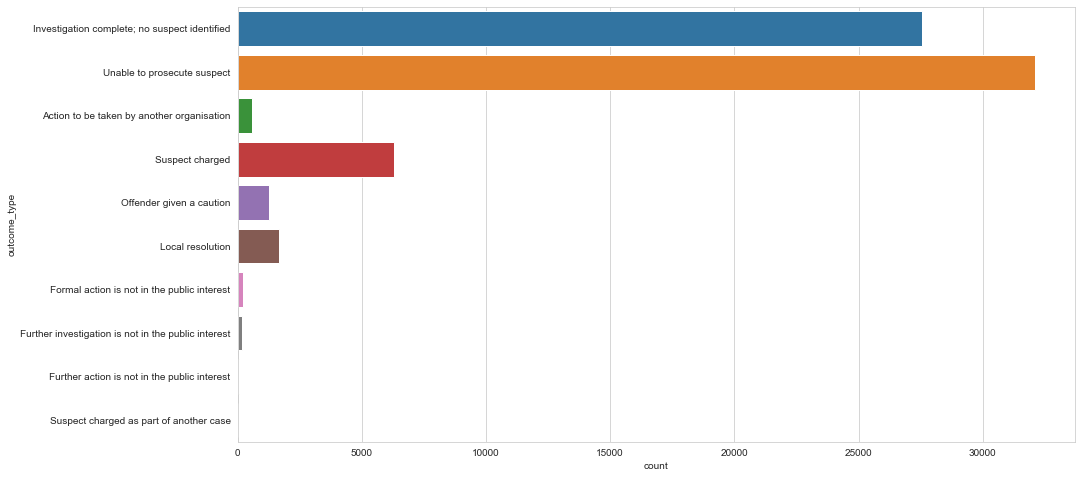

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(y="outcome_type", data=df_final)

In [56]:
df_final["crime_type"].unique()

array(['Criminal damage and arson', 'Vehicle crime', 'Public order',
       'Bicycle theft', 'Burglary', 'Other crime',
       'Violence and sexual offences', 'Shoplifting', 'Other theft',
       'Drugs', 'Robbery', 'Possession of weapons',
       'Theft from the person'], dtype=object)

In [55]:
df_final["crime_type"].value_counts()

Violence and sexual offences    27023
Vehicle crime                    7287
Criminal damage and arson        7208
Other theft                      7033
Shoplifting                      6257
Public order                     5158
Burglary                         3239
Drugs                            2456
Other crime                      1257
Bicycle theft                    1052
Theft from the person             913
Possession of weapons             564
Robbery                           488
Name: crime_type, dtype: int64

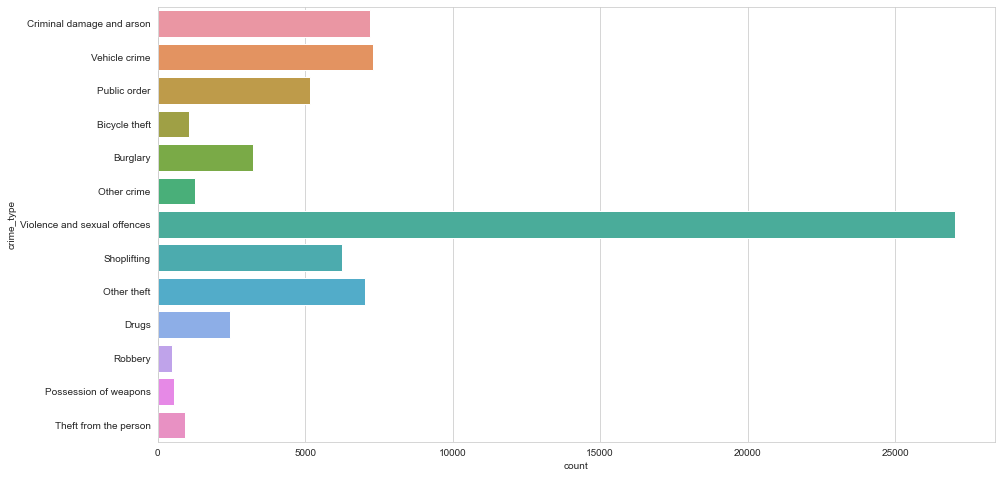

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(y="crime_type", data=df_final)

In [22]:
len(df_final["LSOA code"].unique())

920

In reports about crimes where money or property are taken, “theft”, “burglary” and “robbery” are terms often used interchangeably. There are, however, very clear differences between these offences.

Put very simply, someone is guilty of robbery if he steals from a person using force or makes them think force will be used. Theft means taking someone’s property but does not involve the use of force. Burglary means illegally entering a property in order to steal property from it.

Below is a summary of each offence and what it involves.

*Theft*

In legislation “a person is guilty of theft if he dishonestly appropriates property belonging to another with the intention of permanently depriving the other of it.” This could mean someone stealing from a shop, picking someone’s pocket, stealing a bicycle or car, an employee stealing from their workplace or a guest stealing something from a house during a party.

The maximum sentence for theft is seven years.

*Robbery*

The definition as set out in legislation is as follows: “A person is guilty of robbery if he steals, and immediately before or at the time of doing so, and in order to do so, he uses force on any person or puts or seeks to put any person of being then and there subjected to force”.

This can include a street mugging or robbery of a shop, business or security vehicle.

Due to the violent nature of robbery, it is treated as being more serious than theft and the maximum sentence is life.

*Burglary*

Burglary is committed when an offender either:

a) as a trespasser enters a building intending to steal, inflict grievous bodily harm or do unlawful damage; or,
b) having entered as a trespasser steals or attempts to steal, or inflicts or attempts to inflict grievous bodily harm.

In [60]:
df_final["date"] = pd.to_datetime(df_final["date"])
df_final.head(2)

,crime_id,date,Longitude,Latitude,Location,LSOA_code,LSOA_name,outcome_type,crime_type
0,edc3d49fc37634e28c9dce07d48ac0a85309b7d6c8581d...,2021-01-01,-0.384294,51.61813,On or near LYTHAM AVENUE,E01023805,Three Rivers 010A,Investigation complete; no suspect identified,Criminal damage and arson
1,64b1ed28ec5c6489869daf165a1a70097486fde8c68e94...,2021-01-01,-0.398311,51.65161,On or near Theatre/Concert Hall,E01023902,Watford 010D,Investigation complete; no suspect identified,Vehicle crime


In [65]:
df.drop(["Reported by", "Falls within"], inplace = True, axis = 1)
df

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,edc3d49fc37634e28c9dce07d48ac0a85309b7d6c8581d...,2021-01-01,-0.384294,51.618130,On or near LYTHAM AVENUE,E01023805,Three Rivers 010A,Investigation complete; no suspect identified
1,043f9fb8e70b2b07e62f65c6580d34095aa501923e603d...,2021-01-01,-0.284794,51.809922,On or near MARFORD ROAD,E01023747,St Albans 004B,Local resolution
2,d5b5c3336aa84206fe8ecc6c9a0137178082ee5aa18fde...,2021-01-01,-0.217186,51.793225,On or near MARSDEN ROAD,E01023917,Welwyn Hatfield 006B,Unable to prosecute suspect
3,64b1ed28ec5c6489869daf165a1a70097486fde8c68e94...,2021-01-01,-0.398311,51.651610,On or near Theatre/Concert Hall,E01023902,Watford 010D,Investigation complete; no suspect identified
4,5048d48ca9504cfe74a697e10cda0a4d11c5356e8f91c1...,2021-01-01,-0.184271,51.892380,On or near Parking Area,E01023794,Stevenage 010D,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...
83323,77027427f794d498c5ea468fab431ee5436dc58ba723c0...,2022-01-01,-0.393012,51.666159,On or near CLIVE WAY,E01023895,Watford 005A,Unable to prosecute suspect
83324,1eccff81aea7b334d8953c5de9db950b6859a2cece477f...,2022-01-01,-0.198345,51.796957,On or near REGENT CLOSE,E01023954,Welwyn Hatfield 007A,Investigation complete; no suspect identified
83325,91433b0bd0b64e68807fea8767791f568cde9b57c6ebd0...,2022-01-01,-0.039207,52.052969,On or near GREENFIELD,E01023655,North Hertfordshire 002B,Investigation complete; no suspect identified
83326,a2ff3c09437f6853bd44f1fc4000e764884fd1a86fb06c...,2022-01-01,-0.201690,51.998733,On or near Park/Open Space,E01023636,North Hertfordshire 003B,Unable to prosecute suspect


In [68]:
def month_extract(df, col):
    df[col + "_month_of_year"] = df[col].dt.month
    
    return month_extract

In [69]:
month_extract(df, "Month")

<function __main__.month_extract(df, col)>

In [72]:
df["Month_month_of_year"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [87]:
df2["Crime type"].unique()

array(['Other theft', 'Anti-social behaviour',
       'Criminal damage and arson', 'Violence and sexual offences',
       'Possession of weapons', 'Drugs', 'Public order', 'Vehicle crime',
       'Other crime', 'Burglary', 'Bicycle theft', 'Shoplifting',
       'Theft from the person', 'Robbery'], dtype=object)